# Деревья решений

### Подключаем нужные зависимости

In [158]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import subprocess

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')
%matplotlib inline

### Обработка и подготовка данных
Загружаем данные из файла

In [159]:
df=pd.read_csv("/Users/daniilvdovinov/Desktop/DATA-ANALYSYS_2/Dataset/ORGANICS.csv",encoding="cp1251")
print(df.shape)
print(df.info())

(22223, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            21138 non-null float64
DemAge             20715 non-null float64
DemCluster         21549 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           21942 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB
None


Заменяем пропущенные значения на медианные

In [160]:
df = df.fillna(df.median(axis=0), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


X - выборка из категориальных признаков
Y - целевая переменная

In [201]:
x=df[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=df.values[::,11]

Разделяем на тренировочную и тестовую выборку

In [162]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [163]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

### Первое дерево решений
Глубина - 5, измерение качества раскола - gini

In [164]:
tree=DecisionTreeClassifier(criterion='gini', max_depth=5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Сохраняем дерево решений в файл и визуализируем

In [165]:
export_graphviz(tree, out_file='/Users/daniilvdovinov/Desktop/DATA-ANALYSIS/Homework/Homework3/Organics_tree.dot', 
               rounded = True, proportion = False, 
                precision = 2, filled = True,feature_names=x.columns)
(graph, ) = pydot.graph_from_dot_file('/Users/daniilvdovinov/Desktop/DATA-ANALYSIS/Homework/Homework3/Organics_tree.dot')
graph.write_png('/Users/daniilvdovinov/Desktop/DATA-ANALYSIS/Homework/Homework3/Organics_tree.png')

In [166]:
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Результат на обучающей выборке:  0.8052841347390075
Результат на тестовой выборке:  0.7985600719964002


Критерий - энтропия, глубина - 5 

In [168]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=5, )
tree.fit(X_train, y_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Результат на обучающей выборке:  0.8052841347390075
Результат на тестовой выборке:  0.7985600719964002


Чем меньше глубина, тем менее точнее предсказание

In [187]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(X_train, y_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Результат на обучающей выборке:  0.7652352789920288
Результат на тестовой выборке:  0.7579121043947803


Дерево очень точно подстроилось под обучающую выборку. Но на тестовой выборке точность предсказаний мала 

In [188]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=1)
tree.fit(X_train, y_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Результат на обучающей выборке:  0.9964001028542042
Результат на тестовой выборке:  0.6991150442477876


Другой вариант ограничения разбиения - это минимальное кол-во образцов в каждом листе

In [192]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=500)
tree.fit(X_train, y_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Результат на обучающей выборке:  0.7995628696322962
Результат на тестовой выборке:  0.7958602069896505


### Посмотрим на разделяющую поверхность дерева при разных параметрах глубины

In [193]:
def get_grid(data):
    x_min, x_max = data.iloc[:, 0].min() - 1, data.iloc[:, 0].max() + 1
    y_min, y_max = data.iloc[:, 1].min() - 1, data.iloc[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

def plot_surface(tree, train):
    xx, yy = get_grid(train)
    predicted = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.pcolormesh(xx, yy, predicted, cmap='autumn')

In [194]:
x=df[['DemAffl',  'DemAge']]
y=df.values[::,11]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)


Глубина всего 1

Результат на обучающей выборке:  0.7658781177680638
Результат на тестовой выборке:  0.7564121793910304


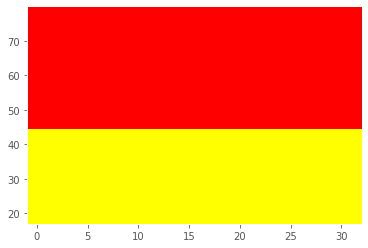

In [197]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree.fit(X_train, y_train)
plot_surface(tree, X_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Глубина - 2

Результат на обучающей выборке:  0.7938416045255849
Результат на тестовой выборке:  0.7856607169641517


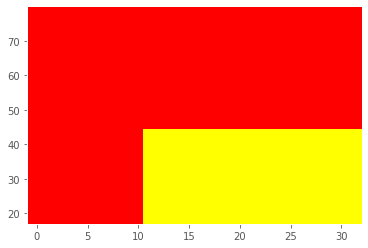

In [198]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(X_train, y_train)
plot_surface(tree, X_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Глубина - 5

Результат на обучающей выборке:  0.8065055284134739
Результат на тестовой выборке:  0.792410379481026


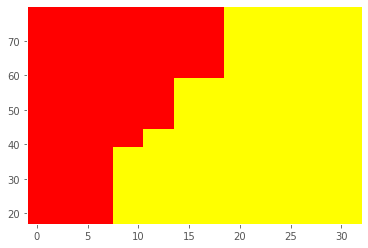

In [205]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree.fit(X_train, y_train)
plot_surface(tree, X_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

Слишком большая глубина, дерево переобучено

Результат на обучающей выборке:  0.8183337618925174
Результат на тестовой выборке:  0.7876106194690266


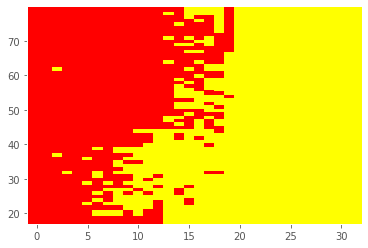

In [204]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=200, min_samples_leaf=1)
tree.fit(X_train, y_train)
plot_surface(tree, X_train)
print('Результат на обучающей выборке: ', tree.score(X_train,y_train))
print('Результат на тестовой выборке: ',tree.score(X_test, y_test))

### Функция для бинарного кодирования категориального признака

In [210]:
def binary_code(data, feature):
    for i in data[feature].unique():
        data[feature + '=' + i] = (data[feature] == i).astype(float)

In [211]:
binary_code(df, 'PromClass')
df.head()

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt,PromClass=Gold,PromClass=Silver,PromClass=Tin,PromClass=Platinum
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,0,0,1.0,0.0,0.0,0.0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,0,0,1.0,0.0,0.0,0.0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,1,1,0.0,1.0,0.0,0.0
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,1,1,0.0,0.0,1.0,0.0
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,0,0,0.0,0.0,1.0,0.0
